## Prueba de normalidad

In [4]:
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Francisco Valerio/Desktop/Work work/Atco/GDMTH-Project/notebooks/datos_2021.csv')

In [3]:
normality_results = {}

for column in ['base', 'intermedia', 'punta', 'distribucion', 'capacidad']:

    stat, p_value = shapiro(data[column].dropna())

    normality_results[column] = {'W-statistic': stat, 'p-value': p_value}

for variable, result in normality_results.items():

    print(f"{variable} -> W-statistic: {result['W-statistic']}, p-value: {result['p-value']}")

base -> W-statistic: 0.5776413307153216, p-value: 1.3637584020691544e-113
intermedia -> W-statistic: 0.8367339360750901, p-value: 1.5724199115372193e-89
punta -> W-statistic: 0.6694457198880917, p-value: 4.1484694989059604e-107
distribucion -> W-statistic: 0.8419971659093151, p-value: 9.422865012515325e-89
capacidad -> W-statistic: 0.6912580594193073, p-value: 2.4501973098713632e-105


c:\Users\Francisco Valerio\Desktop\Work work\Atco\GDMTH-Project\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21421.
  res = hypotest_fun_out(*samples, **kwds)


## Resultados

- W-statistic: los valores cercanos a 1, indicarían que los datos se aproximan a una distribución normal. En este caso, los valores son significativamente más bajos, lo que sugiere que los datos no se ajustan bien a una distribución normal.

- p-value: todos los valores $p$ son extremadamente bajos (p <<< 0.05), por lo que existe suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal

## Conclusión

Ninguna de las tarifas analizadas sigue una distribución normal. Esto sugiere que podria ser más adecuado utilizar técnicas no paramétricas o transformaciones de datos para análisis futuros.

## Análisis de correlación

In [5]:
correlation_matrix = data[['base', 'intermedia', 'punta', 'distribucion', 'capacidad']].corr()

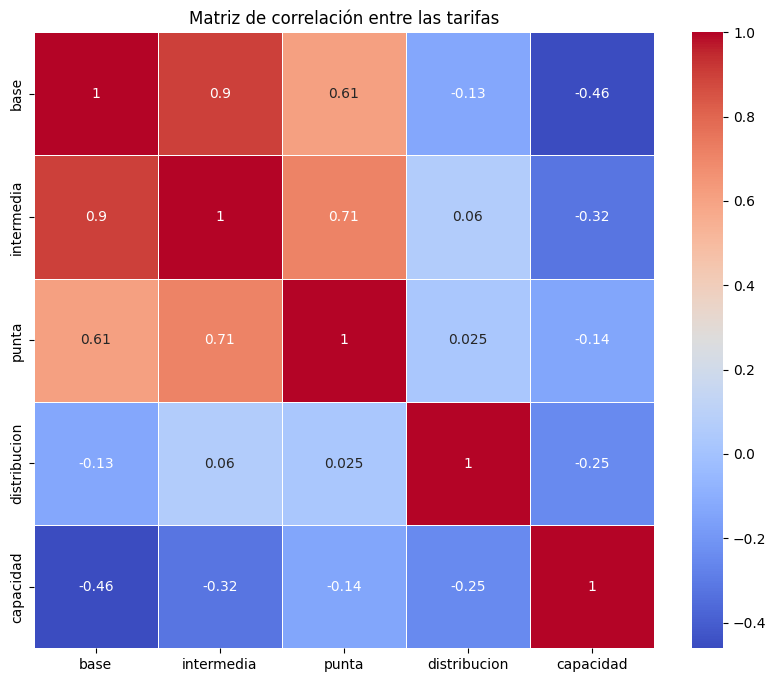

In [6]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de correlación entre las tarifas')

plt.show()


## Outliers

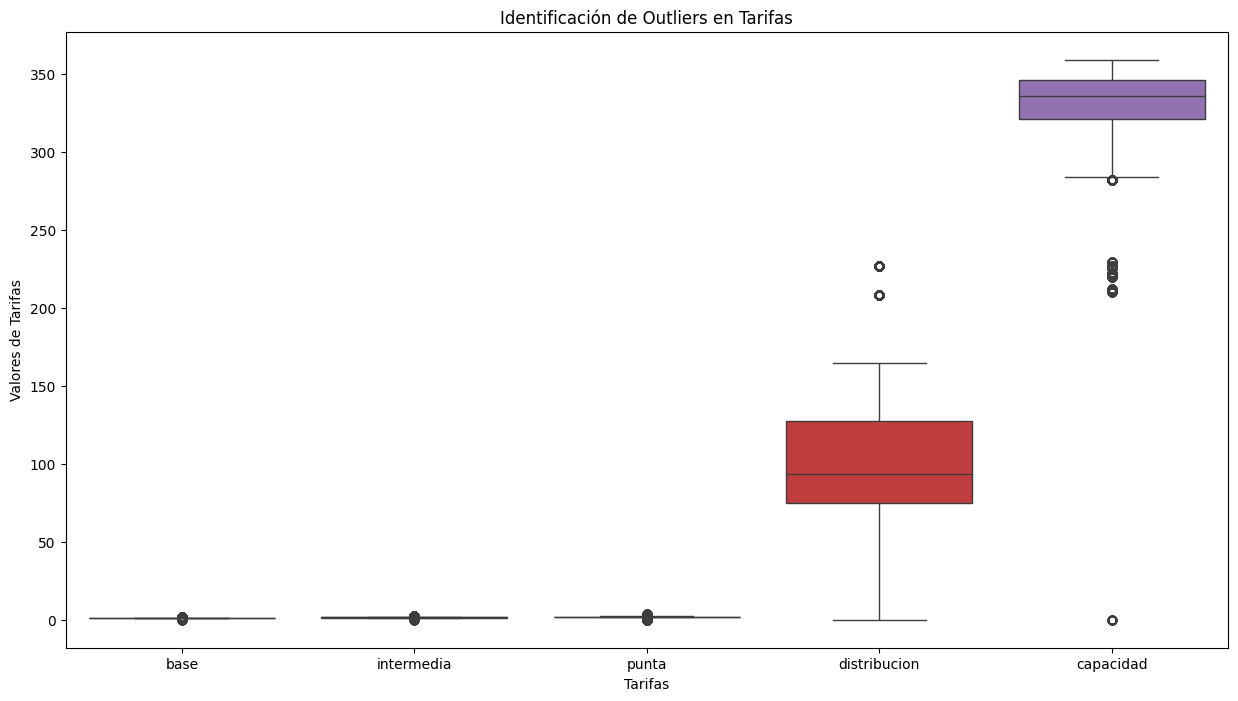

In [7]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(15, 8))

# Creamos un boxplot para cada una de las tarifas
sns.boxplot(data=data[['base', 'intermedia', 'punta', 'distribucion', 'capacidad']])

# Títulos y etiquetas
plt.title('Identificación de Outliers en Tarifas')
plt.xlabel('Tarifas')
plt.ylabel('Valores de Tarifas')
plt.show()

In [8]:
def detect_outliers(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [11]:
outliers_base = detect_outliers(data, 'base')
outliers_intermedia = detect_outliers(data, 'intermedia')
outliers_punta = detect_outliers(data, 'punta')
outliers_distribucion = detect_outliers(data, 'distribucion')
outliers_capacidad = detect_outliers(data, 'capacidad')

# Mostramos cuántos outliers fueron encontrados en cada tarifa
print(f"Outliers en 'base': {len(outliers_base)}")
print(f"Outliers en 'intermedia': {len(outliers_intermedia)}")
print(f"Outliers en 'punta': {len(outliers_punta)}")
print(f"Outliers en 'distribucion': {len(outliers_distribucion)}")
print(f"Outliers en 'capacidad': {len(outliers_capacidad)}")

Outliers en 'base': 2607
Outliers en 'intermedia': 1348
Outliers en 'punta': 1348
Outliers en 'distribucion': 1062
Outliers en 'capacidad': 1045


In [23]:
outliers_base[['estado']].value_counts()

estado             
CAMPECHE               1080
BAJA CALIFORNIA SUR     720
BAJA CALIFORNIA         584
YUCATÁN                 113
QUINTANA ROO             66
CIUDAD DE MÉXICO         30
SONORA                   10
ESTADO DE MÉXICO          4
Name: count, dtype: int64

In [24]:
outliers_intermedia[['estado']].value_counts()

estado             
BAJA CALIFORNIA SUR    720
BAJA CALIFORNIA        584
CIUDAD DE MÉXICO        30
SONORA                  10
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [25]:
outliers_punta['estado'].value_counts()

estado
BAJA CALIFORNIA SUR    720
BAJA CALIFORNIA        584
CIUDAD DE MÉXICO        30
SONORA                  10
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [26]:
outliers_capacidad['estado'].value_counts()

estado
BAJA CALIFORNIA SUR    720
CHIAPAS                168
OAXACA                  51
TABASCO                 51
CIUDAD DE MÉXICO        30
CAMPECHE                12
COAHUILA                 9
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [27]:
outliers_distribucion['estado'].value_counts()

estado
GUERRERO            448
MORELOS             267
VERACRUZ            141
ESTADO DE MÉXICO    127
PUEBLA               37
MICHOACÁN            21
TABASCO               9
OAXACA                8
HIDALGO               4
Name: count, dtype: int64